In [2]:
from utils.ocean_basins import get_zoned_df
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

In [3]:
features = ['SST', 'SAL', 'ice_frac', 'mixed_layer_depth', 'heat_flux_down', 'water_flux_up', 'stress_X', 'stress_Y', 'currents_X', 'currents_Y','fco2','fco2_pre','co2flux','co2flux_pre']

data_2009 = pd.read_pickle('../../data/2009_df.pkl')
df = data_2009[data_2009['time_centered'] == '2009-01-16 12:00:00']

/Users/jakobmeggendorfer/Documents/CAU/Masterarbeit/master-thesis/notebooks/utils/ocean_basins.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_ARCTIC['zone'] = 'ARCTIC'
/Users/jakobmeggendorfer/Documents/CAU/Masterarbeit/master-thesis/notebooks/utils/ocean_basins.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_SOUTHERN_OCEAN['zone'] = 'SOUTHERN_OCEAN'
/var/folders/ns/4sxfm4t95836d2h_1wgqvzdh0000gn/T/ipykernel_60951/113530129.py:5: SettingWithCopyWarning: 
A value is trying to be set on a

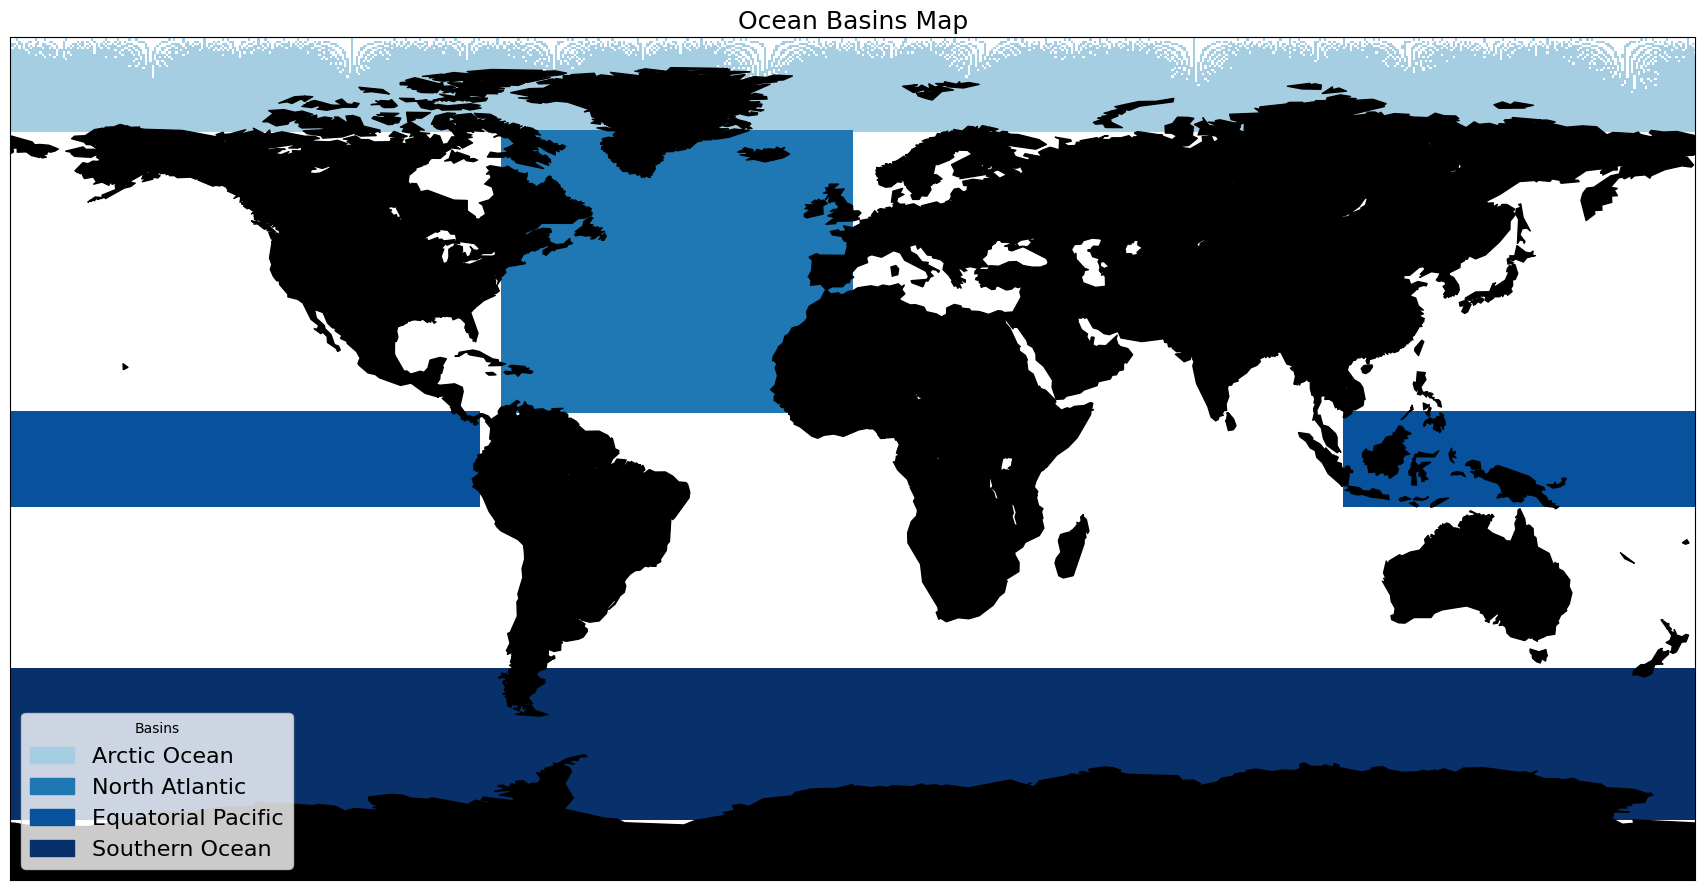

In [6]:
# Get zoned DataFrames
zone_ARCTIC, zone_NORTH_ATLANTIC, zone_EQ_PACIFIC, zone_SOUTHERN_OCEAN = get_zoned_df(df)

# Assign zone labels
zone_ARCTIC['zone'] = 1
zone_NORTH_ATLANTIC['zone'] = 2
zone_EQ_PACIFIC['zone'] = 3
zone_SOUTHERN_OCEAN['zone'] = 4

combined_df = pd.concat(
    [zone_ARCTIC, zone_NORTH_ATLANTIC, zone_EQ_PACIFIC, zone_SOUTHERN_OCEAN],
    ignore_index=True
)

# Define map boundaries
lat_min, lat_max = -77, 90
lon_min, lon_max = -180, 180

# Create lat-lon grid
num_lat, num_lon = 360, 720
lat_grid = np.linspace(lat_min, lat_max, num_lat)
lon_grid = np.linspace(lon_min, lon_max, num_lon)
lon_grid, lat_grid = np.meshgrid(lon_grid, lat_grid)

# Initialize map
m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c')

# Initialize grid
grid_values = np.zeros_like(lat_grid)

# Map zones to grid
for _, row in combined_df.iterrows():
    lat_idx = np.argmin(np.abs(lat_grid[:, 0] - row['nav_lat']))
    lon_idx = np.argmin(np.abs(lon_grid[0, :] - row['nav_lon']))
    grid_values[lat_idx, lon_idx] = row['zone']

# Mask land values
masked_data = np.ma.masked_where(grid_values == 0, grid_values)

# Custom colormap (four distinct colors)
colors = ['#a6cee3', '#1f78b4', '#08519c', '#08306b']
cmap = ListedColormap(colors)
norm = BoundaryNorm([0.5, 1.5, 2.5, 3.5, 4.5], cmap.N)

# Plotting
plt.figure(figsize=(18, 9))
x, y = m(lon_grid, lat_grid)
pcm = m.pcolormesh(x, y, masked_data, cmap=cmap, norm=norm, shading='auto', latlon=True)

m.drawcoastlines()
m.fillcontinents(color='lightgray', lake_color='white')

# Add legend manually
legend_labels = ['Arctic Ocean', 'North Atlantic', 'Equatorial Pacific', 'Southern Ocean']
patches = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(4)]
m.fillcontinents(color='black')
plt.legend(handles=patches, loc='lower left', fontsize=16, title='Basins')

plt.title('Ocean Basins Map', fontsize=18)
plt.tight_layout()
plt.savefig("../plots/general/basins/ocean_basins.png", dpi=400)
plt.show()


/Users/jakobmeggendorfer/Documents/CAU/Masterarbeit/master-thesis/notebooks/utils/ocean_basins.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_ARCTIC['zone'] = 'ARCTIC'
/Users/jakobmeggendorfer/Documents/CAU/Masterarbeit/master-thesis/notebooks/utils/ocean_basins.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_SOUTHERN_OCEAN['zone'] = 'SOUTHERN_OCEAN'


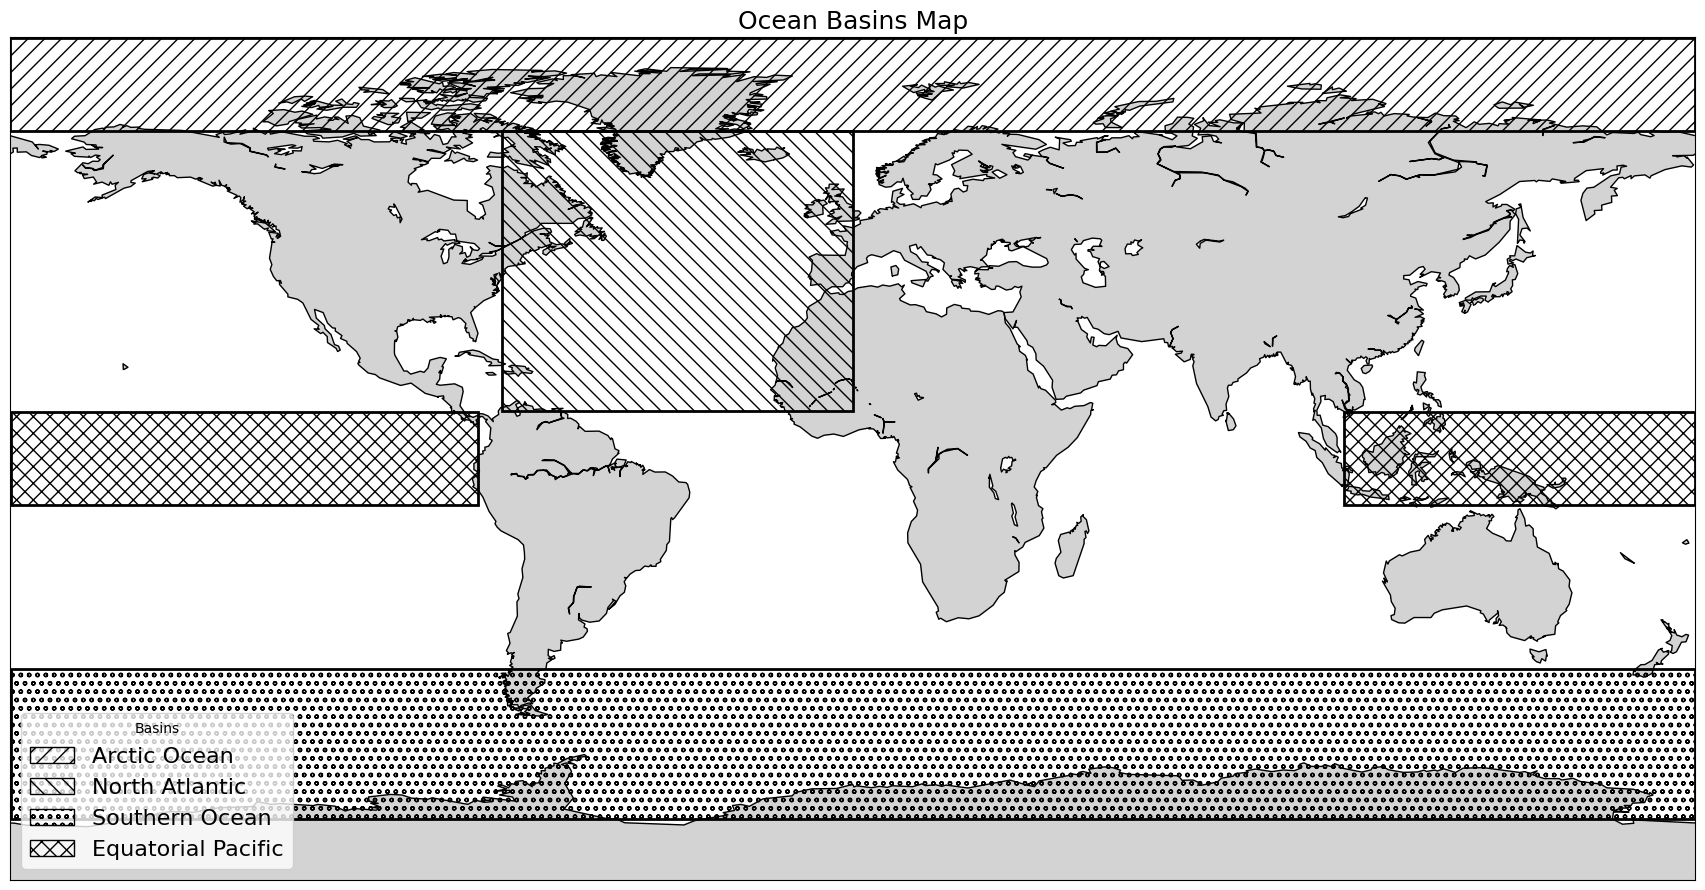

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.basemap import Basemap

# Get zoned DataFrames
zone_ARCTIC, zone_NORTH_ATLANTIC, zone_EQ_PACIFIC, zone_SOUTHERN_OCEAN = get_zoned_df(df)

# Assign labels and hatch patterns
zones = [
    (zone_ARCTIC, 'Arctic Ocean', '//'),
    (zone_NORTH_ATLANTIC, 'North Atlantic', '\\\\'),
    (zone_SOUTHERN_OCEAN, 'Southern Ocean', 'oo')
]

# Separate Equatorial Pacific for special handling
eq_pacific_label = 'Equatorial Pacific'
eq_pacific_hatch = 'xx'

# Initialize map
plt.figure(figsize=(18, 9))
m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c')

m.drawcoastlines()
m.fillcontinents(color='lightgray', lake_color='white')

# Draw standard zone rectangles
legend_patches = []
for zone_df, label, hatch in zones:
    min_lat = zone_df['nav_lat'].min()
    max_lat = zone_df['nav_lat'].max()
    min_lon = zone_df['nav_lon'].min()
    max_lon = zone_df['nav_lon'].max()

    rect = mpatches.Rectangle((min_lon, min_lat), max_lon - min_lon, max_lat - min_lat,
                              linewidth=2, edgecolor='black', facecolor='none', hatch=hatch)
    plt.gca().add_patch(rect)

    legend_patches.append(mpatches.Patch(facecolor='none', edgecolor='black', hatch=hatch, label=label))

# Draw Equatorial Pacific in two parts if it crosses the dateline
eq_df = zone_EQ_PACIFIC
min_lat = eq_df['nav_lat'].min()
max_lat = eq_df['nav_lat'].max()

# Split by longitude
part1 = eq_df[eq_df['nav_lon'] >= 0]        # e.g., 150°E to 180°E
part2 = eq_df[eq_df['nav_lon'] < 0]         # e.g., -180° to -110°W

# Draw first part (e.g., 150 to 180)
if not part1.empty:
    lon1_min = part1['nav_lon'].min()
    lon1_max = part1['nav_lon'].max()
    rect1 = mpatches.Rectangle((lon1_min, min_lat), lon1_max - lon1_min, max_lat - min_lat,
                               linewidth=2, edgecolor='black', facecolor='none', hatch=eq_pacific_hatch)
    plt.gca().add_patch(rect1)

# Draw second part (e.g., -180 to -110)
if not part2.empty:
    lon2_min = part2['nav_lon'].min()
    lon2_max = part2['nav_lon'].max()
    rect2 = mpatches.Rectangle((lon2_min, min_lat), lon2_max - lon2_min, max_lat - min_lat,
                               linewidth=2, edgecolor='black', facecolor='none', hatch=eq_pacific_hatch)
    plt.gca().add_patch(rect2)

# Add to legend manually
legend_patches.append(mpatches.Patch(facecolor='none', edgecolor='black', hatch=eq_pacific_hatch, label=eq_pacific_label))

# Final legend and plot
plt.legend(handles=legend_patches, loc='lower left', fontsize=16, title='Basins')
plt.title('Ocean Basins Map', fontsize=18)
plt.tight_layout()
plt.savefig("../plots/general/basins/ocean_basins_hatched_zones_fixed.png", dpi=400)
plt.show()
